In [1]:
import pickle

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from pycaret.regression import *
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler

2023-11-07 23:54:47.665391: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-07 23:54:47.665478: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-07 23:54:47.665507: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-07 23:54:47.673463: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pickle.load(open("./data.pkl", "rb"))

In [3]:
x_train, y_train = data["x_train"], data["y_train"]
x_test, y_test = data["x_test"], data["y_test"]

In [4]:
df = pd.DataFrame(data=np.column_stack((x_train, y_train)), columns=["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Lat", "Long", "MedHouseVal"])
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Lat,Long,MedHouseVal
0,2.6618,10.0,6.204082,1.255102,1403.0,2.045190,34.10,-116.32,0.810
1,2.7639,9.0,8.758621,1.724138,66.0,2.275862,39.04,-122.69,1.125
2,3.6875,15.0,4.170787,1.129213,1888.0,2.121348,34.15,-118.25,2.096
3,2.1766,24.0,3.690883,1.052707,3243.0,4.619658,36.68,-121.63,1.085
4,5.3955,47.0,5.502336,0.995327,961.0,2.245327,37.30,-121.89,2.823


In [5]:
df.shape

(15480, 9)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

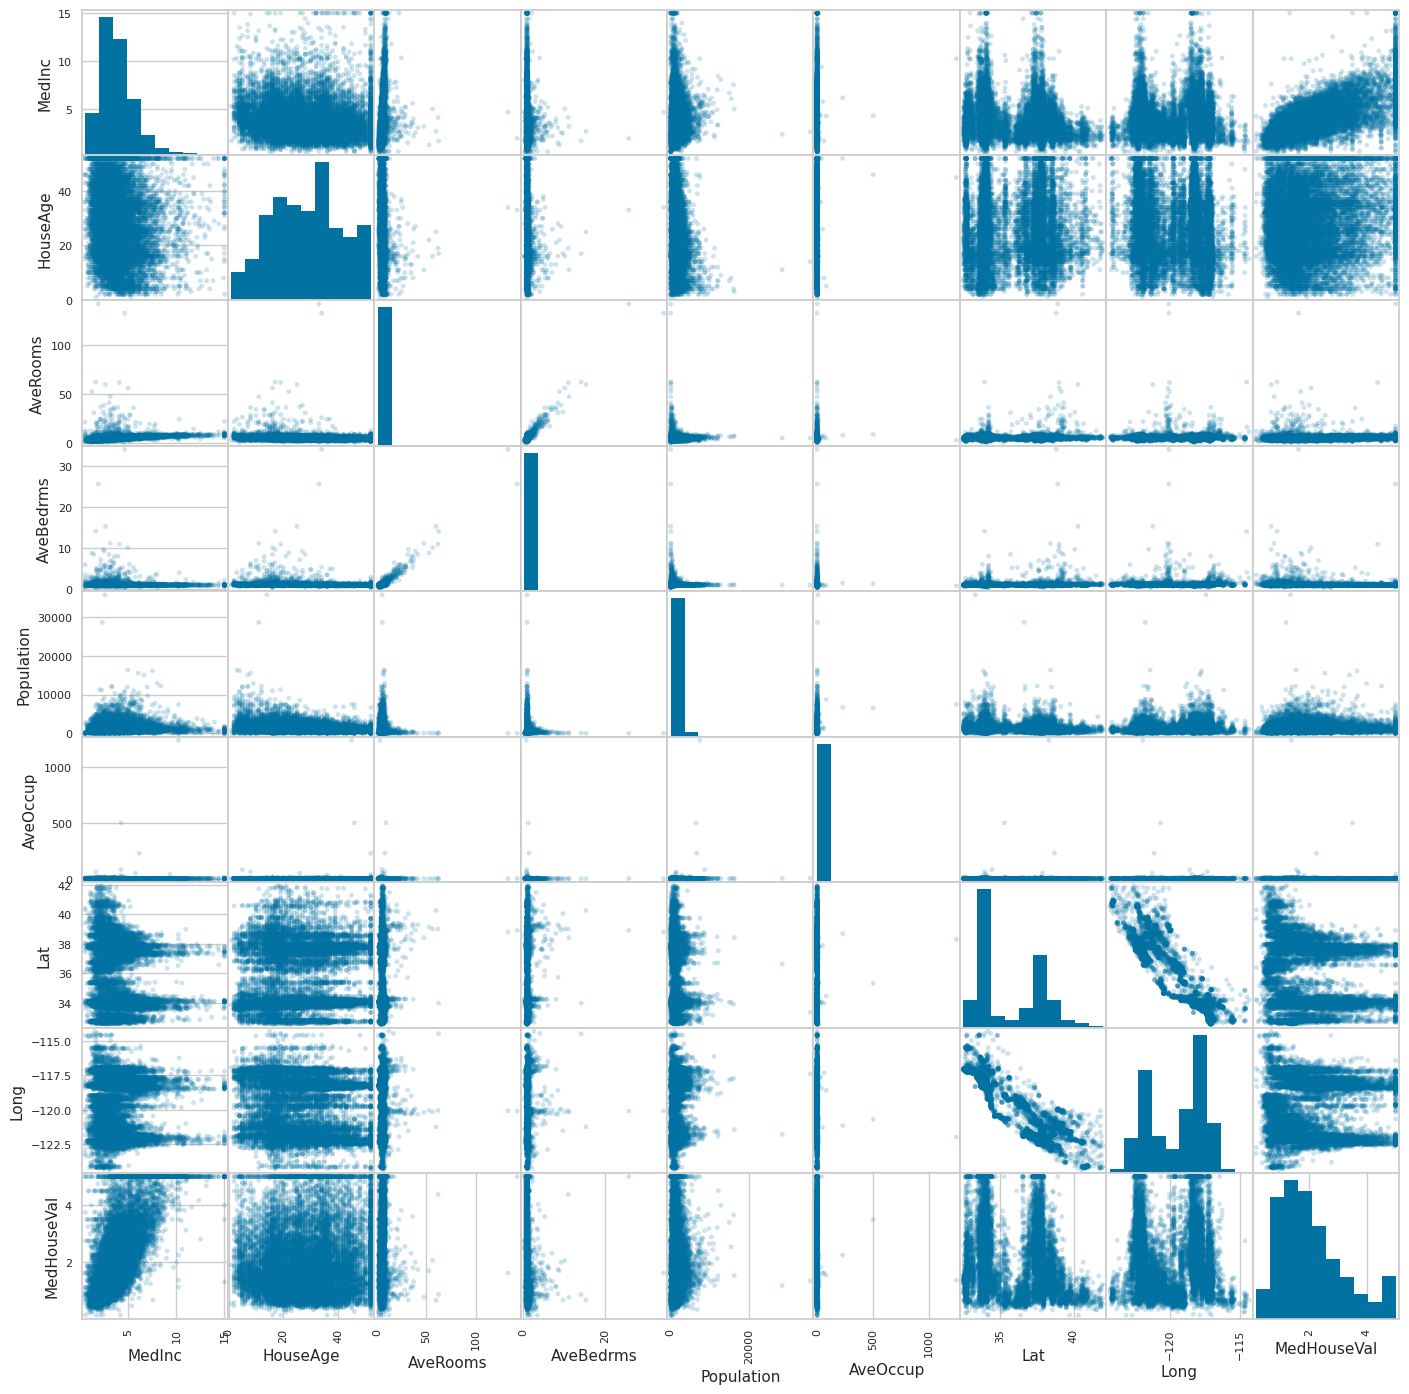

In [6]:
c = pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(17, 17), diagonal='hist')

In [7]:
profile_report = ProfileReport(df, title="Profiling Report")
profile_report.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
s = setup(df, target="MedHouseVal", session_id=123, normalize = True, normalize_method = 'zscore')

,Description,Value
0,Session id,123
1,Target,MedHouseVal
2,Target type,Regression
3,Original data shape,"(15480, 9)"
4,Transformed data shape,"(15480, 9)"
5,Transformed train set shape,"(10836, 9)"
6,Transformed test set shape,"(4644, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [13]:
best_mae_models_top3 = compare_models(sort = 'MAE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.3038,0.2103,0.4580,0.8444,0.1387,0.1716,1.4570
lightgbm,Light Gradient Boosting Machine,0.3195,0.2283,0.4771,0.8311,0.1445,0.1813,0.2550
xgboost,Extreme Gradient Boosting,0.3247,0.2358,0.4848,0.8255,0.1476,0.1842,0.0330
et,Extra Trees Regressor,0.3393,0.2636,0.5127,0.8051,0.1519,0.1909,0.2650
rf,Random Forest Regressor,0.3447,0.2753,0.5238,0.7965,0.1568,0.1973,0.7460
gbr,Gradient Boosting Regressor,0.3717,0.2919,0.5397,0.7841,0.1637,0.2130,0.2140
knn,K Neighbors Regressor,0.4586,0.4459,0.6676,0.6699,0.1977,0.2532,0.0380
dt,Decision Tree Regressor,0.4916,0.5770,0.7592,0.5732,0.2240,0.2689,0.0190
huber,Huber Regressor,0.5375,3.5163,1.2306,-1.5891,0.2260,0.3033,0.0110
br,Bayesian Ridge,0.5396,0.5428,0.7362,0.5984,0.2265,0.3229,0.0090


In [17]:
best_mae_models_top3

 LGBMRegressor(n_jobs=-1, random_state=123),
 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=123, ...)]